# Irrigation Utility Consumption Time Series Anomaly Detection 

Irrigation Utility Anomaly Detection is based on the detection of the anomaly in the Irrigation Dataset.  

Here, for the analysis of the whole datast, we will be using the Unsupervised Machine Learning models which are as: 

1. Isolation Forest which is a tree based algorithm and the best general anomaly detector.  

2. Local outiler Factor: Its density based and finds local unusual points. 

3. Elliptic Envelope: Its a ststistical based algorithm and works when the data is guassian. 

In [59]:
# Importing the libraries 
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.covariance import EllipticEnvelope 
from sklearn.preprocessing import StandardScaler 
  


In [60]:
# imprting the dataset for thr data analysis 
df = pd.read_csv("irrigation.csv")
df 

,timestamp,Panther_lodging_Dianna,Panther_lodging_Dean,Panther_lodging_Cora,Panther_parking_Lorriane,Panther_parking_Asia,Panther_lodging_Kara,Panther_lodging_Drew,Panther_lodging_Ricky,Panther_parking_Clarence,...,Panther_parking_Stanley,Panther_lodging_Bonnie,Panther_lodging_Aaron,Panther_education_Karri,Panther_lodging_Jacquelyn,Panther_education_Lacey,Panther_lodging_Marlyn,Panther_lodging_Janice,Panther_office_Larry,Panther_lodging_Otis
0,2016-01-01 00:00:00,0.000,0.0,0.0000,7.8737,0.0,0.0000,0.000,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,0.000,0.0000,0.000
1,2016-01-01 01:00:00,0.000,0.0,0.0000,0.0000,0.0,0.0000,0.000,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,378.541,1.1356,0.000
2,2016-01-01 02:00:00,0.000,0.0,28.3906,0.0000,0.0,0.0000,0.000,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,0.000,0.0000,0.000
3,2016-01-01 03:00:00,0.000,0.0,6.8137,1018.8052,0.0,0.0000,6813.738,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,378.541,1.1356,0.000
4,2016-01-01 04:00:00,0.000,0.0,3.4069,12.4540,0.0,0.0000,5299.574,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,378.541,0.0000,378.541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,0.000,0.0,NaN,NaN,0.0,0.3785,378.541,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,NaN
17540,2017-12-31 20:00:00,757.082,0.0,NaN,NaN,0.0,0.3785,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,NaN
17541,2017-12-31 21:00:00,19684.132,0.0,NaN,NaN,0.0,0.7571,378.541,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1135.623,0.0000,NaN
17542,2017-12-31 22:00:00,13248.935,0.0,NaN,NaN,0.0,0.3785,0.000,0.0,757.082,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,6056.656,1.1356,NaN


Here, as we can see that the whole data is set here and hence the time series irrigation or the dataset is as: 

1. Each row : Time stamp (hourly data) 

2. Each column : Water/ Energy usage location 

3. Values basially represent the consumption amount like i the litres, gallons.

Examples from the dataset used for the irrigation analysis is done as: 

1. Panther_Lodging_Dianna : Water usage in lodging area 

2. Panther_parking_asia : Parking irrigation meter 

3. panther_office_larry : Office irrigation 

4. panther_education_Aurora : Eductation building usage 

In [61]:
print("original Shape: ", df.shape)  
# The shape of  the dataset gets printed 

original Shape:  (17544, 38)


In [62]:
df.describe() 

,Panther_lodging_Dianna,Panther_lodging_Dean,Panther_lodging_Cora,Panther_parking_Lorriane,Panther_parking_Asia,Panther_lodging_Kara,Panther_lodging_Drew,Panther_lodging_Ricky,Panther_parking_Clarence,Panther_parking_Adela,...,Panther_parking_Stanley,Panther_lodging_Bonnie,Panther_lodging_Aaron,Panther_education_Karri,Panther_lodging_Jacquelyn,Panther_education_Lacey,Panther_lodging_Marlyn,Panther_lodging_Janice,Panther_office_Larry,Panther_lodging_Otis
count,15320.000000,16472.000000,7559.000000,14823.000000,16924.000000,11214.000000,17477.000000,17488.000000,16593.000000,13957.000000,...,14761.000000,13583.0,13728.0,15393.000000,13148.0,16809.000000,16569.000000,17486.000000,16422.000000,15913.000000
mean,1029.740239,32.104285,1053.869008,804.629885,1.990673,130.695032,1118.557574,1049.180669,33.626796,33.326037,...,109.220657,0.0,0.0,12.271289,0.0,3.558182,24.338206,1190.659302,6.297075,553.904941
std,3545.133447,161.727905,3372.345825,2801.605237,27.379424,427.990322,3112.103082,2461.068533,230.145341,243.662471,...,803.116421,0.0,0.0,84.601642,0.0,41.755849,145.874862,2868.899630,68.290449,1687.425179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.517300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.271200,43.153700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,14.763100,99.934800,0.000000,0.378500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,378.541000,0.000000,0.000000
max,23848.083000,2649.787000,18382.708800,24069.908400,378.541000,2135.728300,40503.887000,13627.476000,2649.787000,4057.581000,...,9084.984000,0.0,0.0,1135.623000,0.0,757.082000,1892.705000,20819.755000,1702.298900,15141.640000


In [63]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  17544 non-null  object 
 1   Panther_lodging_Dianna     15320 non-null  float64
 2   Panther_lodging_Dean       16472 non-null  float64
 3   Panther_lodging_Cora       7559 non-null   float64
 4   Panther_parking_Lorriane   14823 non-null  float64
 5   Panther_parking_Asia       16924 non-null  float64
 6   Panther_lodging_Kara       11214 non-null  float64
 7   Panther_lodging_Drew       17477 non-null  float64
 8   Panther_lodging_Ricky      17488 non-null  float64
 9   Panther_parking_Clarence   16593 non-null  float64
 10  Panther_parking_Adela      13957 non-null  float64
 11  Panther_lodging_Heather    16592 non-null  float64
 12  Panther_office_Daina       16148 non-null  float64
 13  Panther_lodging_Arlene     17488 non-null  flo

In [64]:
# Now,  we will be removing all the duplicate values 
df = df.drop_duplicates() 
df 

,timestamp,Panther_lodging_Dianna,Panther_lodging_Dean,Panther_lodging_Cora,Panther_parking_Lorriane,Panther_parking_Asia,Panther_lodging_Kara,Panther_lodging_Drew,Panther_lodging_Ricky,Panther_parking_Clarence,...,Panther_parking_Stanley,Panther_lodging_Bonnie,Panther_lodging_Aaron,Panther_education_Karri,Panther_lodging_Jacquelyn,Panther_education_Lacey,Panther_lodging_Marlyn,Panther_lodging_Janice,Panther_office_Larry,Panther_lodging_Otis
0,2016-01-01 00:00:00,0.000,0.0,0.0000,7.8737,0.0,0.0000,0.000,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,0.000,0.0000,0.000
1,2016-01-01 01:00:00,0.000,0.0,0.0000,0.0000,0.0,0.0000,0.000,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,378.541,1.1356,0.000
2,2016-01-01 02:00:00,0.000,0.0,28.3906,0.0000,0.0,0.0000,0.000,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,0.000,0.0000,0.000
3,2016-01-01 03:00:00,0.000,0.0,6.8137,1018.8052,0.0,0.0000,6813.738,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,378.541,1.1356,0.000
4,2016-01-01 04:00:00,0.000,0.0,3.4069,12.4540,0.0,0.0000,5299.574,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,378.541,0.0000,378.541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,0.000,0.0,NaN,NaN,0.0,0.3785,378.541,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,NaN
17540,2017-12-31 20:00:00,757.082,0.0,NaN,NaN,0.0,0.3785,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,NaN
17541,2017-12-31 21:00:00,19684.132,0.0,NaN,NaN,0.0,0.7571,378.541,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1135.623,0.0000,NaN
17542,2017-12-31 22:00:00,13248.935,0.0,NaN,NaN,0.0,0.3785,0.000,0.0,757.082,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,6056.656,1.1356,NaN


In [65]:
# Now, we are converting the timestaamp 
df['timestamp'] = pd.to_datetime(df['timestamp'])  



In [66]:
df 

,timestamp,Panther_lodging_Dianna,Panther_lodging_Dean,Panther_lodging_Cora,Panther_parking_Lorriane,Panther_parking_Asia,Panther_lodging_Kara,Panther_lodging_Drew,Panther_lodging_Ricky,Panther_parking_Clarence,...,Panther_parking_Stanley,Panther_lodging_Bonnie,Panther_lodging_Aaron,Panther_education_Karri,Panther_lodging_Jacquelyn,Panther_education_Lacey,Panther_lodging_Marlyn,Panther_lodging_Janice,Panther_office_Larry,Panther_lodging_Otis
0,2016-01-01 00:00:00,0.000,0.0,0.0000,7.8737,0.0,0.0000,0.000,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,0.000,0.0000,0.000
1,2016-01-01 01:00:00,0.000,0.0,0.0000,0.0000,0.0,0.0000,0.000,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,378.541,1.1356,0.000
2,2016-01-01 02:00:00,0.000,0.0,28.3906,0.0000,0.0,0.0000,0.000,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,0.000,0.0000,0.000
3,2016-01-01 03:00:00,0.000,0.0,6.8137,1018.8052,0.0,0.0000,6813.738,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,378.541,1.1356,0.000
4,2016-01-01 04:00:00,0.000,0.0,3.4069,12.4540,0.0,0.0000,5299.574,0.0,0.000,...,0.0,NaN,NaN,NaN,NaN,0.000,0.0,378.541,0.0000,378.541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,0.000,0.0,NaN,NaN,0.0,0.3785,378.541,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,NaN
17540,2017-12-31 20:00:00,757.082,0.0,NaN,NaN,0.0,0.3785,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,NaN
17541,2017-12-31 21:00:00,19684.132,0.0,NaN,NaN,0.0,0.7571,378.541,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1135.623,0.0000,NaN
17542,2017-12-31 22:00:00,13248.935,0.0,NaN,NaN,0.0,0.3785,0.000,0.0,757.082,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,6056.656,1.1356,NaN


In [67]:
df = df.apply(pd.to_numeric, errors = 'coerce')  
df = df.fillna(df.median()) 

df 

,timestamp,Panther_lodging_Dianna,Panther_lodging_Dean,Panther_lodging_Cora,Panther_parking_Lorriane,Panther_parking_Asia,Panther_lodging_Kara,Panther_lodging_Drew,Panther_lodging_Ricky,Panther_parking_Clarence,...,Panther_parking_Stanley,Panther_lodging_Bonnie,Panther_lodging_Aaron,Panther_education_Karri,Panther_lodging_Jacquelyn,Panther_education_Lacey,Panther_lodging_Marlyn,Panther_lodging_Janice,Panther_office_Larry,Panther_lodging_Otis
0,1451606400000000000,0.000,0.0,0.0000,7.8737,0.0,0.0000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000
1,1451610000000000000,0.000,0.0,0.0000,0.0000,0.0,0.0000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,378.541,1.1356,0.000
2,1451613600000000000,0.000,0.0,28.3906,0.0000,0.0,0.0000,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000
3,1451617200000000000,0.000,0.0,6.8137,1018.8052,0.0,0.0000,6813.738,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,378.541,1.1356,0.000
4,1451620800000000000,0.000,0.0,3.4069,12.4540,0.0,0.0000,5299.574,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,378.541,0.0000,378.541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,1514746800000000000,0.000,0.0,2.2712,43.1537,0.0,0.3785,378.541,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000
17540,1514750400000000000,757.082,0.0,2.2712,43.1537,0.0,0.3785,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000
17541,1514754000000000000,19684.132,0.0,2.2712,43.1537,0.0,0.7571,378.541,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1135.623,0.0000,0.000
17542,1514757600000000000,13248.935,0.0,2.2712,43.1537,0.0,0.3785,0.000,0.0,757.082,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,6056.656,1.1356,0.000


In [68]:
df2 = df.drop(['timestamp'], axis = 1) 
df2 

,Panther_lodging_Dianna,Panther_lodging_Dean,Panther_lodging_Cora,Panther_parking_Lorriane,Panther_parking_Asia,Panther_lodging_Kara,Panther_lodging_Drew,Panther_lodging_Ricky,Panther_parking_Clarence,Panther_parking_Adela,...,Panther_parking_Stanley,Panther_lodging_Bonnie,Panther_lodging_Aaron,Panther_education_Karri,Panther_lodging_Jacquelyn,Panther_education_Lacey,Panther_lodging_Marlyn,Panther_lodging_Janice,Panther_office_Larry,Panther_lodging_Otis
0,0.000,0.0,0.0000,7.8737,0.0,0.0000,0.000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000
1,0.000,0.0,0.0000,0.0000,0.0,0.0000,0.000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,378.541,1.1356,0.000
2,0.000,0.0,28.3906,0.0000,0.0,0.0000,0.000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000
3,0.000,0.0,6.8137,1018.8052,0.0,0.0000,6813.738,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,378.541,1.1356,0.000
4,0.000,0.0,3.4069,12.4540,0.0,0.0000,5299.574,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,378.541,0.0000,378.541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,0.000,0.0,2.2712,43.1537,0.0,0.3785,378.541,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000
17540,757.082,0.0,2.2712,43.1537,0.0,0.3785,0.000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000
17541,19684.132,0.0,2.2712,43.1537,0.0,0.7571,378.541,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1135.623,0.0000,0.000
17542,13248.935,0.0,2.2712,43.1537,0.0,0.3785,0.000,0.0,757.082,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,6056.656,1.1356,0.000


Here, there is an important thing to note that the timestamp column is not being removed as because, here the time column plays an important role in the dataset analysis. 

In [80]:
# now, we will be doing the feature scaling of the process  
sc= StandardScaler() 
scaled_data  = sc.fit_transform(df2)  

scaled_data = np.nan_to_num(scaled_data)  
scaled_data 

array([[-0.27000018, -0.19212232, -0.20025695, ..., -0.41423031,
        -0.08919136, -0.31107962],
       [-0.27000018, -0.19212232, -0.20025695, ..., -0.2820991 ,
        -0.07200786, -0.31107962],
       [-0.27000018, -0.19212232, -0.18777147, ..., -0.41423031,
        -0.08919136, -0.31107962],
       ...,
       [ 5.64047627, -0.19212232, -0.19925813, ..., -0.01783666,
        -0.08919136, -0.31107962],
       [ 3.70820512, -0.19212232, -0.19925813, ...,  1.69986917,
        -0.07200786, -0.31107962],
       [ 3.59454212, -0.19212232, -0.19925813, ..., -0.41423031,
        -0.07200786, -0.31107962]], shape=(17544, 37))

Now, comes the major part of the model training, where we will be training the model, make the data anomaly detection and make the predictions. hence, we willbe drawing the insights from that. 

In [81]:
iso =  IsolationForest(contamination = 0.01, random_state = 42) 
iso 

,n_estimators,100
,max_samples,'auto'
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [82]:
iso_pred= iso.fit_predict(scaled_data)  
iso_pred 

array([1, 1, 1, ..., 1, 1, 1], shape=(17544,))

In [83]:
# Now, we will be importing the Local outlier Facctor 
lof = LocalOutlierFactor(n_neighbors = 20, contamination = 0.01) 
lof


,n_neighbors,20
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,contamination,0.01
,novelty,False
,n_jobs,None


In [84]:
lof_pred = lof.fit_predict(scaled_data) 
lof_pred  

# Here, as we can see that the predictions take place by the local outlier factorv

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], shape=(17544,))

In [85]:
# Now, we will be putting the Elliptic Envelope Model 
ell = EllipticEnvelope(contamination = 0.01, random_state = 42) 
ell 

,store_precision,True
,assume_centered,False
,support_fraction,None
,contamination,0.01
,random_state,42


In [86]:
ell_pred= ell.fit_predict(scaled_data) 
ell_pred  

# Here, now as we can see that thr Elliptic Envelope is made 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:753: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], shape=(17544,))

# Combinniing the results 
Now, we will be combining the results to carry out the further pre processing. 

In [87]:
results = pd.DataFrame({
    "IsolationForest" : iso_pred, 
     "LOF" : lof_pred, 
     "EllipticEnvelope" : ell_pred
}) 

results["Final_Anomaly"] = (results.sum(axis = 1) >= 2).astype(int) 

results 

,IsolationForest,LOF,EllipticEnvelope,Final_Anomaly
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
17539,1,1,1,1
17540,1,1,1,1
17541,1,1,1,1
17542,1,1,1,1


In [91]:
df_result = df2.copy() 

df_result["Final_Anomaly"] = results["Final_Anomaly"] 
df_result 

,Panther_lodging_Dianna,Panther_lodging_Dean,Panther_lodging_Cora,Panther_parking_Lorriane,Panther_parking_Asia,Panther_lodging_Kara,Panther_lodging_Drew,Panther_lodging_Ricky,Panther_parking_Clarence,Panther_parking_Adela,...,Panther_lodging_Bonnie,Panther_lodging_Aaron,Panther_education_Karri,Panther_lodging_Jacquelyn,Panther_education_Lacey,Panther_lodging_Marlyn,Panther_lodging_Janice,Panther_office_Larry,Panther_lodging_Otis,Final_Anomaly
0,0.000,0.0,0.0000,7.8737,0.0,0.0000,0.000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000,1
1,0.000,0.0,0.0000,0.0000,0.0,0.0000,0.000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,378.541,1.1356,0.000,1
2,0.000,0.0,28.3906,0.0000,0.0,0.0000,0.000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000,1
3,0.000,0.0,6.8137,1018.8052,0.0,0.0000,6813.738,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,378.541,1.1356,0.000,1
4,0.000,0.0,3.4069,12.4540,0.0,0.0000,5299.574,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,378.541,0.0000,378.541,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,0.000,0.0,2.2712,43.1537,0.0,0.3785,378.541,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000,1
17540,757.082,0.0,2.2712,43.1537,0.0,0.3785,0.000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0000,0.000,1
17541,19684.132,0.0,2.2712,43.1537,0.0,0.7571,378.541,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,1135.623,0.0000,0.000,1
17542,13248.935,0.0,2.2712,43.1537,0.0,0.3785,0.000,0.0,757.082,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,6056.656,1.1356,0.000,1


# Viewing the anomaly counts 
Now, we will  be visualizing the anomaly counts for the whole table. 

In [92]:
print("Anomaly Counts:\n") 

print(results["Final_Anomaly"].value_counts()) 

Anomaly Counts:

Final_Anomaly
1    17054
0      490
Name: count, dtype: int64


1 refers to anomaly and 0 refers to no anomaly. 

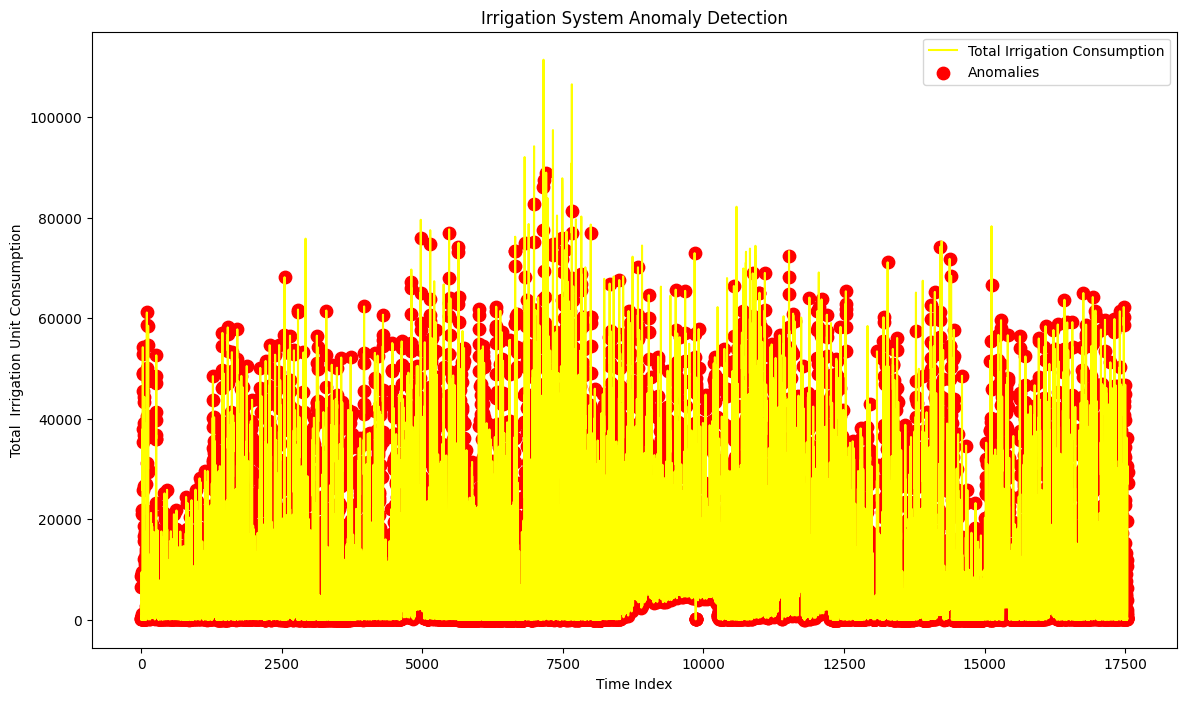

In [99]:
total_usage = df2.sum(axis = 1)
plt.figure(figsize = (14,8)) 

plt.plot(total_usage, label = "Total Irrigation Consumption", color ='yellow')

# highlighting the anomalies 
anomalies = results["Final_Anomaly"] == 1 

plt.scatter(total_usage.index[anomalies],
            total_usage[anomalies],
            color = 'red', 
            s =  80, 
            label = "Anomalies") 

plt.title("Irrigation System Anomaly Detection")  
plt.xlabel("Time Index") 
plt.ylabel('Total  Irrigation Unit Consumption') 
plt.legend() 
plt.show() 

# Explanation of the Graph  
Here we can occcur the insights from the graph as: 

Most ed dots occur at very high spikes. This tells that the model has detected the high usage of water. This basically tells as: 
1. Pipe Leakage 
2. Over Irrigation 
3.  Valve malfunction 
4. Pump left on 
5. Sensor on 

It also tells that the some anomalies also occur at the very low consumption. The model also flagged unexpectedly low usage.  

the possible reasons are: 
1. Sensor Failure 
2. System shutdown 
3. Blocked pipes 
4. Power otrage 

Also one  more insight which can be drawn is that the anomalies are not random and  they appear in clusters which basically indicate continuous events. 

# Saving the results 

In [100]:
# Now, we will be saving the results o the anomaly detection as: 

df_result.to_csv("irrigation_anomaly_results.csv", index = False) 

print("\n✅ DONE! Results saved.")


✅ DONE! Results saved.


In [101]:
results.to_csv("irrigation_anomaly_model_results.csv", index = False) 

print("\n✅ DONE! Results saved.") 


✅ DONE! Results saved.
